## Quantum Autoencoder (QAE) for Seismic Impedance Inversion

we explore the use of Quantum Autoencoders (QAE) for analyzing seismic traces. A Quantum Autoencoder is a quantum machine learning model that can be employed to compress and reconstruct data using quantum circuits. The primary goal of this tutorial is to explain the theoretical concepts behind the QAE model, its mathematical formulation, and how it is applied to seismic data.

A Quantum Autoencoder consists of two main components: the encoder and the decoder. The encoder compresses the input data into a quantum state, while the decoder reconstructs the data from the quantum state.

The encoder circuit maps classical data into a quantum state. Suppose we have an input data vector $\mathbf{x} = (x_1, x_2, \ldots, x_n)$, where $n$ is the number of quantum bits (qubits) used in the circuit. The encoding operation can be represented as:

\begin{equation}
|\psi_{\text{encoded}}\rangle = U_{\text{encoder}} |\mathbf{x}\rangle
\end{equation}

where $U_{\text{encoder}}$ is the unitary operation applied to the data vector $\mathbf{x}$.

The decoder circuit reconstructs the classical data from the quantum state. The reconstruction process can be expressed as:

\begin{equation}
\mathbf{x}' = \langle \psi_{\text{encoded}}| U_{\text{decoder}} |\psi_{\text{encoded}}\rangle
\end{equation}

where $U_{\text{decoder}}$ is the unitary operation used for decoding.

\section{Loss Function}

The performance of a Quantum Autoencoder is evaluated using a loss function that measures the difference between the original data and the reconstructed data. The Mean Squared Error (MSE) is commonly used as the loss function:

\begin{equation}
\text{MSE} = \frac{1}{N} \sum_{i=1}^N (x_i - x'_i)^2
\end{equation}

where $x_i$ denotes the original data and $x'_i$ denotes the reconstructed data, with $N$ being the number of data points.

Our dataset consists of seismic trace data and corresponding impedance trace data. The goal is to train a QAE to reconstruct seismic traces and predict impedance from these traces.

Data normalization is an essential preprocessing step that scales the data to a specific range, usually [0, 1]. This process improves the efficiency of the training algorithms. For normalization, we use the Min-Max scaling technique, defined by:

\begin{equation}
x_{\text{normalized}} = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)}
\end{equation}

where $( x )$ is the original data value, and $( x_{normalized} )$ is the normalized data value.

To fit the data into the quantum autoencoder, we segment the data into fixed-size chunks. Each segment should match the number of qubits (wires) in the quantum circuit. For a given segment length \( L \), the segmented data is constructed as follows:

\begin{equation}
\text{Segmented Data} = \left\{ \text{Data}[i \cdot L:(i + 1) \cdot L] \mid i = 0, 1, \ldots, \frac{\text{len(Data)}}{L} - 1 \right\}
\end{equation}


A Quantum Autoencoder (QAE) is composed of two primary components: the encoder and the decoder. The encoder maps classical data to a quantum state, and the decoder reconstructs the classical data from the quantum state.

The encoder circuit performs a sequence of quantum gates on the input data. The data is encoded using the following gates:

- $( RY(\theta) )$ gates for encoding the data into the quantum state.
- $( RX(\theta) )$ and $( RY(\theta) )$ gates for applying transformations based on learnable parameters.
- $( CNOT )$ gates for entangling the qubits.

The output of the encoder is a quantum state, denoted by:

\begin{equation}
|\psi_{\text{encoded}}\rangle = \text{Encoder}(data, weights)
\end{equation}

\subsection{QAE Decoder Circuit}

The decoder circuit reconstructs the data from the encoded quantum state using similar gates:

- $( RY(\theta) )$ and $( RX(\theta) )$ gates for decoding the quantum state.
- $( CNOT )$ gates for disentangling the qubits.

The reconstructed data is obtained by measuring the expectation values of Pauli-Z operators:

\begin{equation}
\text{Reconstructed Data} = \text{Decoder}(|\psi_{\text{encoded}}\rangle, weights)
\end{equation}


To train the QAE, we define a cost function that measures the reconstruction error. The cost function is the Mean Squared Error (MSE) between the original and reconstructed data:

\begin{equation}
\text{MSE} = \frac{1}{N} \sum_{i=1}^N (x_i - \hat{x}_i)^2
\end{equation}

where \( x_i \) is the original data point, and \( \hat{x}_i \) is the reconstructed data point.

The Mean Absolute Error (MAE) is also used to evaluate the performance:

\begin{equation}
\text{MAE} = \frac{1}{N} \sum_{i=1}^N |x_i - \hat{x}_i|
\end{equation}

where \( x_i \) is the original data point, and \( \hat{x}_i \) is the reconstructed data point.

The QAE parameters are optimized using the Adam optimizer, which updates the encoder and decoder weights to minimize the cost function. The update rule for Adam is given by:

\begin{equation}
\theta_{t+1} = \theta_t - \alpha \frac{m_t}{\sqrt{v_t} + \epsilon}
\end{equation}

where \( \theta_t \) represents the parameters at iteration \( t \), \( \alpha \) is the learning rate, \( m_t \) and \( v_t \) are the estimates of the first and second moments, and \( \epsilon \) is a small constant for numerical stability.


/usr/local/lib/python3.10/dist-packages/jax/_src/numpy/array_methods.py:66: UserWarning: Explicitly requested dtype <class 'jax.numpy.complex128'> requested in astype is not available, and will be truncated to dtype complex64. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(arr, dtype)
/usr/local/lib/python3.10/dist-packages/jax/_src/numpy/array_methods.py:66: UserWarning: Explicitly requested dtype <class 'jax.numpy.complex128'> requested in astype is not available, and will be truncated to dtype complex64. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(arr, dtype)
/usr/local/lib/python3.10/dist-packages/jax/_src/numpy/array_methods.py:66: UserWarning: Explicitly requested dtype 

Step: 0 Loss: 0.7171996235847473 MSE: 0.27107173204421997 MAE: 0.45050135254859924
Step: 5 Loss: 0.0709635317325592 MSE: 0.058507610112428665 MAE: 0.20205441117286682
Step: 10 Loss: 0.022978249937295914 MSE: 0.02357712760567665 MAE: 0.13069184124469757
Step: 15 Loss: 0.01794150471687317 MSE: 0.017067113891243935 MAE: 0.09070785343647003
Step: 20 Loss: 0.01563264988362789 MSE: 0.014124122448265553 MAE: 0.08799733966588974
Step: 25 Loss: 0.01229233480989933 MSE: 0.010712956078350544 MAE: 0.08280237019062042
Step: 30 Loss: 0.008864156901836395 MSE: 0.008676763623952866 MAE: 0.07220757007598877
Step: 35 Loss: 0.007096954621374607 MSE: 0.0071440450847148895 MAE: 0.06670793145895004
Step: 40 Loss: 0.005959679372608662 MSE: 0.005457588937133551 MAE: 0.056330230087041855
Step: 45 Loss: 0.004975189920514822 MSE: 0.004768013954162598 MAE: 0.05193191394209862
Step: 50 Loss: 0.004424376413226128 MSE: 0.004413536284118891 MAE: 0.049347709864377975
Step: 55 Loss: 0.004291051533073187 MSE: 0.00420353

/usr/local/lib/python3.10/dist-packages/jax/_src/numpy/array_methods.py:66: UserWarning: Explicitly requested dtype <class 'jax.numpy.complex128'> requested in astype is not available, and will be truncated to dtype complex64. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(arr, dtype)


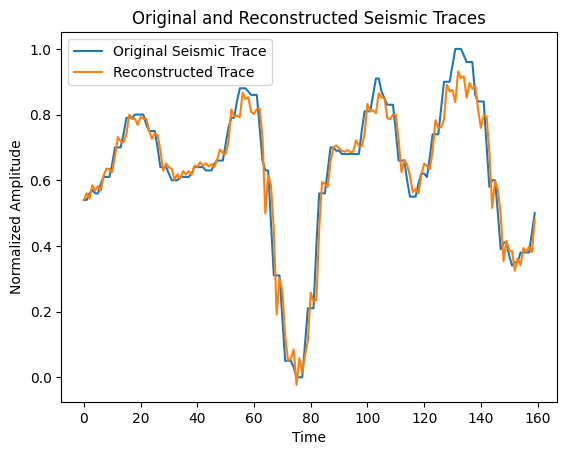

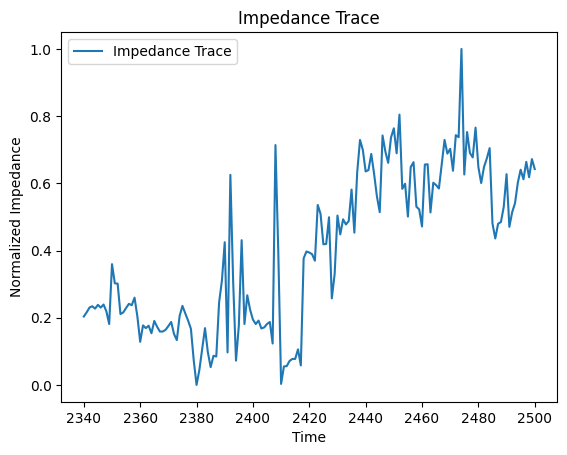

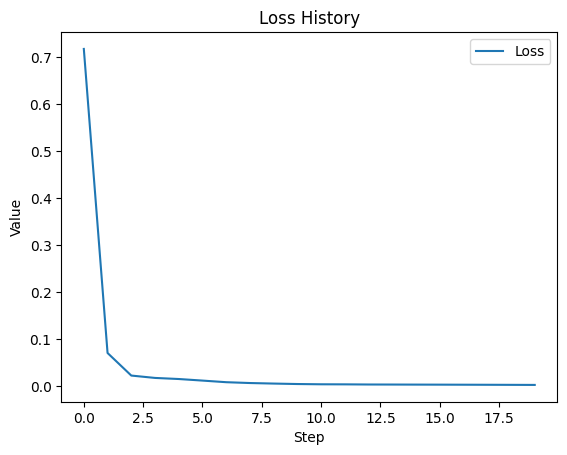

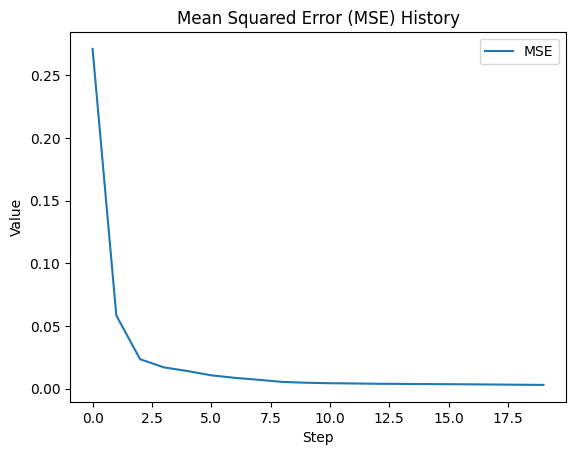

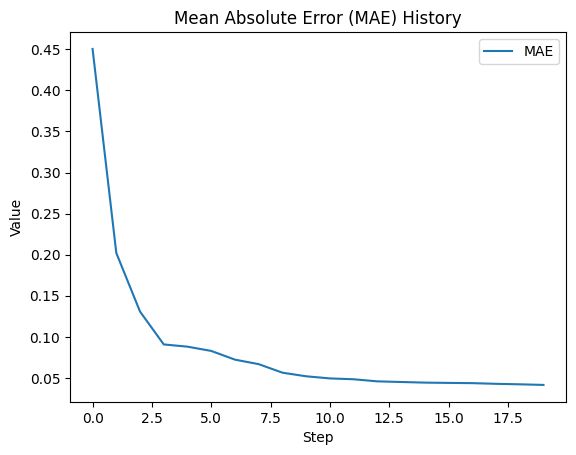

In [3]:
import pennylane as qml
from jax import numpy as jnp
import jax
import optax
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Data preparation
seismic_data = np.genfromtxt('seismic_trace_15_9_F-15-A.csv', delimiter=';')

time_seismic = -np.round(seismic_data[:, 0])
time_seismic, unique_indices = np.unique(time_seismic, return_index=True)
dt_seismic = time_seismic[1] - time_seismic[0]

seismic_trace = seismic_data[unique_indices, 1]
Ip_trace = seismic_data[unique_indices, 2]

start_time = 2340.0
end_time = 2500.0

seismic_trace_cropped = seismic_trace[np.where((time_seismic >= start_time) & (time_seismic <= end_time))]
Ip_trace_cropped = Ip_trace[np.where((time_seismic >= start_time) & (time_seismic <= end_time))]
time_cropped = time_seismic[np.where((time_seismic >= start_time) & (time_seismic <= end_time))]

source_statistical = np.genfromtxt('statistical_source_wavelet.txt', delimiter='\t')
dt_source = 1e-3

# Data normalization
scaler_seismic = MinMaxScaler()
seismic_trace_cropped_normalized = scaler_seismic.fit_transform(seismic_trace_cropped.reshape(-1, 1)).flatten()

scaler_ip = MinMaxScaler()
Ip_trace_cropped_normalized = scaler_ip.fit_transform(Ip_trace_cropped.reshape(-1, 1)).flatten()

# Segment data to fit n_wires
n_wires = 4
segment_length = n_wires

def segment_data(data, segment_length):
    num_segments = len(data) // segment_length
    return np.array([data[i*segment_length:(i+1)*segment_length] for i in range(num_segments)])

segmented_data = segment_data(seismic_trace_cropped_normalized, segment_length)
segmented_targets = segment_data(Ip_trace_cropped_normalized, segment_length)

# Convert to JAX arrays
data = jnp.array(segmented_data)
targets = jnp.array(segmented_targets)

# Quantum device setup
dev = qml.device("default.qubit", wires=n_wires)

# Define the QAE circuits
@qml.qnode(dev)
def QAE_encoder(data, weights):
    """Quantum Autoencoder encoder circuit"""
    for i in range(n_wires):
        qml.RY(data[i], wires=i)
    for i in range(n_wires):
        qml.RX(weights[i, 0], wires=i)
        qml.RY(weights[i, 1], wires=i)
        qml.RX(weights[i, 2], wires=i)
        qml.CNOT(wires=[i, (i + 1) % n_wires])
    return qml.state()

@qml.qnode(dev)
def QAE_decoder(encoded_data, weights):
    """Quantum Autoencoder decoder circuit"""
    qml.QubitStateVector(encoded_data, wires=range(n_wires))
    for i in range(n_wires):
        qml.RX(weights[i, 0], wires=i)
        qml.RY(weights[i, 1], wires=i)
        qml.RX(weights[i, 2], wires=i)
        qml.CNOT(wires=[i, (i + 1) % n_wires])
    return [qml.expval(qml.PauliZ(i)) for i in range(n_wires)]

def my_QAE_model(data, encoder_weights, decoder_weights):
    encoded_data = QAE_encoder(data, encoder_weights)
    reconstructed_data = QAE_decoder(encoded_data, decoder_weights)
    return jnp.array(reconstructed_data)

# Define the cost function
@jax.jit
def QAE_loss_fn(params, data):
    encoder_weights, decoder_weights = params["encoder_weights"], params["decoder_weights"]
    reconstructed_data = jnp.array([my_QAE_model(d, encoder_weights, decoder_weights) for d in data])
    loss = jnp.mean((data - reconstructed_data) ** 2)
    return loss

# Compute the Mean Squared Error (MSE)
def compute_mse(original_data, reconstructed_data):
    return jnp.mean((original_data - reconstructed_data) ** 2)

# Compute the Mean Absolute Error (MAE)
def compute_mae(original_data, reconstructed_data):
    return jnp.mean(jnp.abs(original_data - reconstructed_data))

# Calculate and print additional metrics
def compute_metrics(original_data, reconstructed_data):
    mse = compute_mse(original_data, reconstructed_data)
    mae = compute_mae(original_data, reconstructed_data)
    return mse, mae

# Initialize the parameters
encoder_weights = jnp.ones([n_wires, 3])
decoder_weights = jnp.ones([n_wires, 3])
params = {"encoder_weights": encoder_weights, "decoder_weights": decoder_weights}

# Create the optimizer
opt = optax.adam(learning_rate=0.3)
opt_state = opt.init(params)

# Define the update step function
def update_QAE_step(opt, params, opt_state, data):
    loss_val, grads = jax.value_and_grad(QAE_loss_fn)(params, data)
    updates, opt_state = opt.update(grads, opt_state)
    params = optax.apply_updates(params, updates)
    return params, opt_state, loss_val

# Optimization loop with metrics
loss_history = []
mse_history = []
mae_history = []

for i in range(100):
    params, opt_state, loss_val = update_QAE_step(opt, params, opt_state, data)

    # Calculate metrics every 5 steps
    if i % 5 == 0:
        reconstructed_data = jnp.array([my_QAE_model(d, params["encoder_weights"], params["decoder_weights"]) for d in data])
        mse, mae = compute_metrics(data, reconstructed_data)
        print(f"Step: {i} Loss: {loss_val} MSE: {mse} MAE: {mae}")

        loss_history.append(loss_val)
        mse_history.append(mse)
        mae_history.append(mae)

# Jitting the optimization loop
@jax.jit
def update_QAE_step_jit(i, args):
    params, opt_state, data, print_training = args

    loss_val, grads = jax.value_and_grad(QAE_loss_fn)(params, data)
    updates, opt_state = opt.update(grads, opt_state)
    params = optax.apply_updates(params, updates)

    def print_fn():
        jax.debug.print("Step: {i}  Loss: {loss_val}", i=i, loss_val=loss_val)

    # if print_training=True, print the loss every 5 steps
    jax.lax.cond((jnp.mod(i, 5) == 0) & print_training, print_fn, lambda: None)

    return (params, opt_state, data, print_training)

@jax.jit
def optimization_QAE_jit(params, data, print_training=False):
    opt_state = opt.init(params)
    args = (params, opt_state, data, print_training)
    (params, opt_state, _, _) = jax.lax.fori_loop(0, 100, update_QAE_step_jit, args)
    return params

# Optimizing the QAE model
params = optimization_QAE_jit(params, data, print_training=True)

# Save the trained model
with open('trained_QAE_params.npz', 'wb') as f:
    np.savez(f, encoder_weights=params["encoder_weights"], decoder_weights=params["decoder_weights"])

# Load the trained model (if needed)
loaded_params = np.load('trained_QAE_params.npz')
params = {"encoder_weights": loaded_params["encoder_weights"], "decoder_weights": loaded_params["decoder_weights"]}

# Plot the seismic traces and reconstructed data
reconstructed_data = jnp.array([my_QAE_model(d, params["encoder_weights"], params["decoder_weights"]) for d in data])

# Flatten the segmented data for plotting
original_data_flat = seismic_trace_cropped_normalized[:len(reconstructed_data.flatten())]

plt.figure()
plt.plot(original_data_flat, label='Original Seismic Trace')
plt.plot(reconstructed_data.flatten(), label='Reconstructed Trace')
plt.xlabel('Time')
plt.ylabel('Normalized Amplitude')
plt.legend()
plt.title('Original and Reconstructed Seismic Traces')
plt.show()

# Plot the wavelet impedance
plt.figure()
plt.plot(time_cropped, Ip_trace_cropped_normalized, label='Impedance Trace')
plt.xlabel('Time')
plt.ylabel('Normalized Impedance')
plt.legend()
plt.title('Impedance Trace')
plt.show()

# Plot metrics
plt.figure()
plt.plot(loss_history, label='Loss')
plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Loss History')
plt.legend()
plt.show()

plt.figure()
plt.plot(mse_history, label='MSE')
plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Mean Squared Error (MSE) History')
plt.legend()
plt.show()

plt.figure()
plt.plot(mae_history, label='MAE')
plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Mean Absolute Error (MAE) History')
plt.legend()
plt.show()


we will visualize various metrics related to the training process of the Quantum Autoencoder (QAE) model and assess the reconstruction quality. We will plot the training loss, Mean Squared Error (MSE), Mean Absolute Error (MAE), and examine the reconstruction errors to understand how well the QAE model performs.


The training loss is a crucial metric that indicates how well the model is learning over time. The loss function measures the difference between the predicted output and the actual data. It is defined by:

\begin{equation}
\text{Loss} = \frac{1}{N} \sum_{i=1}^N (x_i - \hat{x}_i)^2
\end{equation}

where $( x_i )$ represents the original data point, and \( \hat{x}_i \) is the reconstructed data point.

Plotting the training loss over epochs helps us observe the convergence behavior of the model. A decreasing trend in the loss indicates that the model is learning effectively.

The Mean Squared Error (MSE) is used to quantify the reconstruction error in the model. It is defined as:

\begin{equation}
\text{MSE} = \frac{1}{N} \sum_{i=1}^N (x_i - \hat{x}_i)^2
\end{equation}

where $( x_i )$ is the original data, and $( \hat{x}_i )$ is the reconstructed data. Plotting MSE over training steps allows us to track how well the model is minimizing reconstruction errors.


The Mean Absolute Error (MAE) provides another measure of reconstruction quality. It is calculated as:

\begin{equation}
\text{MAE} = \frac{1}{N} \sum_{i=1}^N |x_i - \hat{x}_i|
\end{equation}

where \( x_i \) is the original data, and \( \hat{x}_i \) is the reconstructed data. MAE is less sensitive to outliers compared to MSE and helps us evaluate the average magnitude of errors.

To understand the distribution of reconstruction errors, we compute the difference between original and reconstructed data:

\begin{equation}
\text{Error} = x_i - \hat{x}_i
\end{equation}

Plotting the histogram of these errors provides insight into their distribution, revealing if the errors are uniformly distributed or if there are significant discrepancies.

 comparing the original and reconstructed data visually. For each selected segment:
- Plot the original segment and the reconstructed segment to observe the model’s performance on individual segments.


This visualization helps in assessing the model’s ability to capture the nuances of the data.

A scatter plot showing the correlation between original and reconstructed data is useful for understanding the overall performance of the QAE model:

\begin{equation}
\text{Correlation} = \text{Scatter Plot of } (x_i, \hat{x}_i)
\end{equation}

This plot helps us see if the reconstructed data closely follows the original data.


To track the changes in reconstruction error over time, we plot:

\begin{equation}
\text{Reconstruction Error} = x_i - \hat{x}_i
\end{equation}

versus time steps. This plot helps us understand how errors evolve during the reconstruction process.

Finally, comparing plots of the original data and the reconstructed data side-by-side provides a clear visual indication of how well the QAE model has reconstructed the data:

- Plot the original data and reconstructed data to visually inspect the quality of the reconstruction.


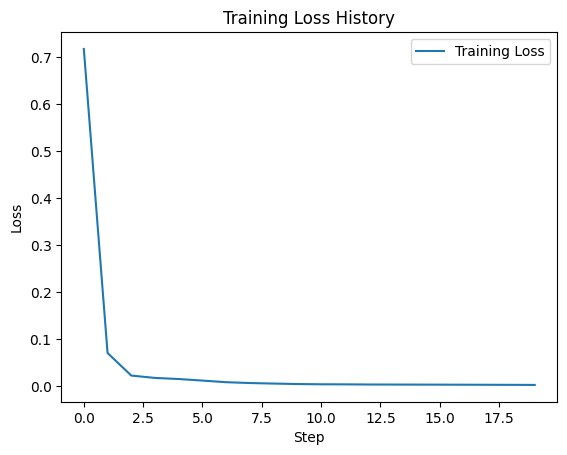

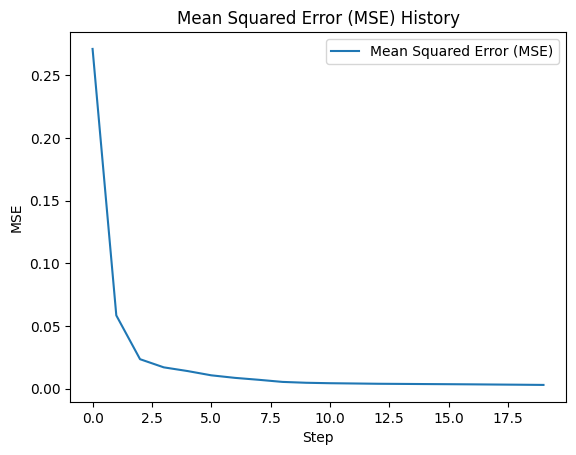

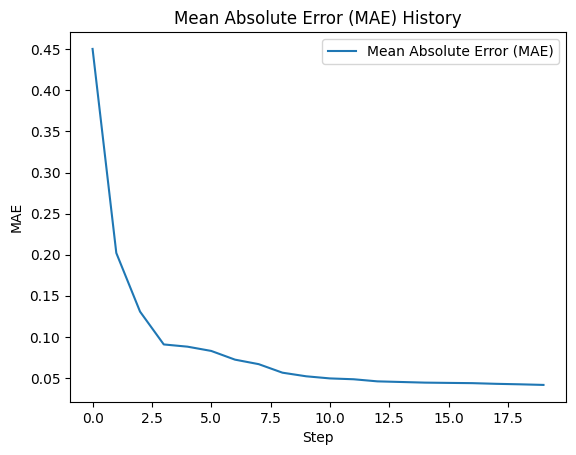

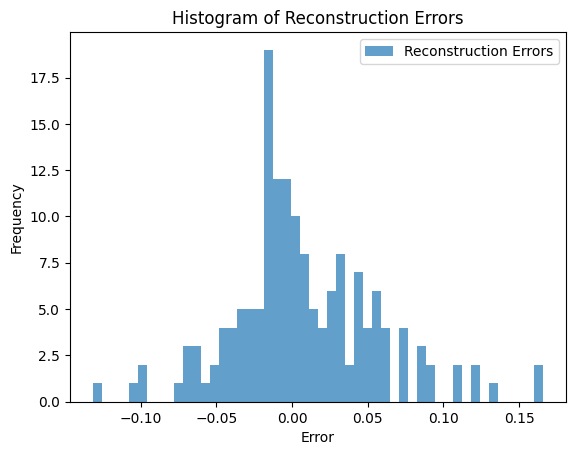

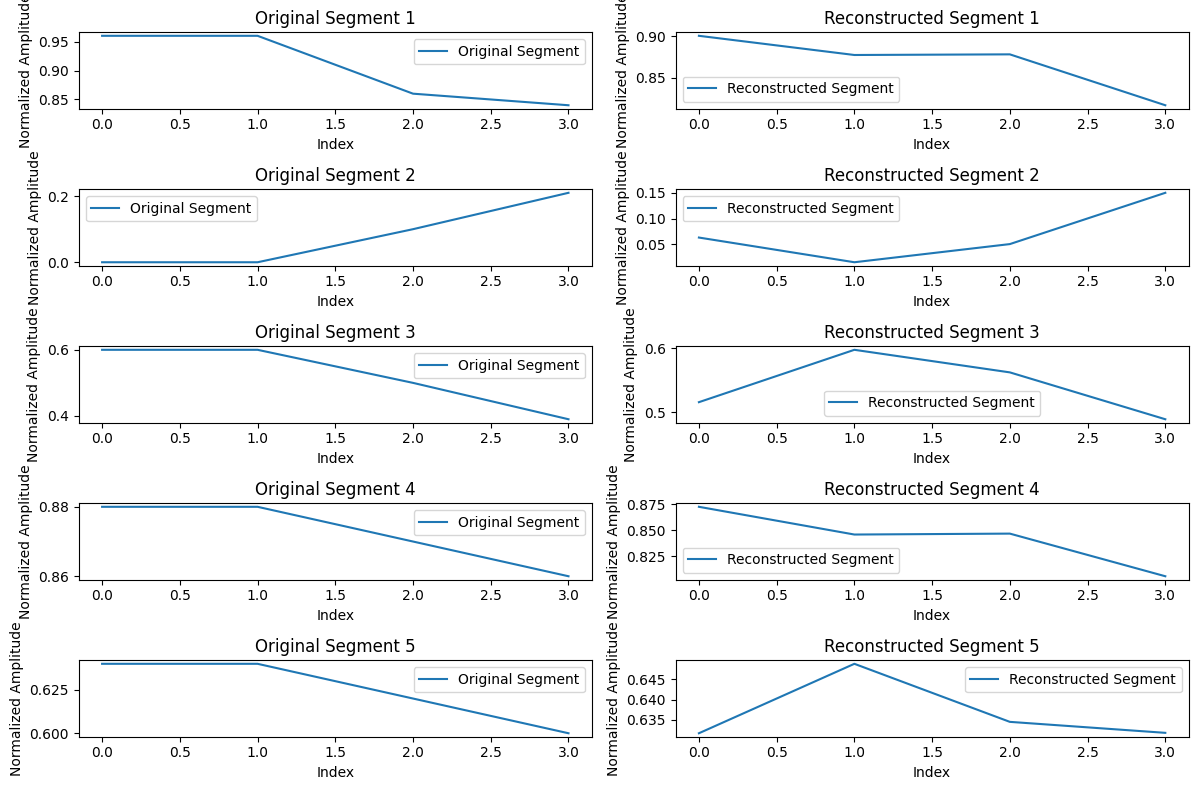

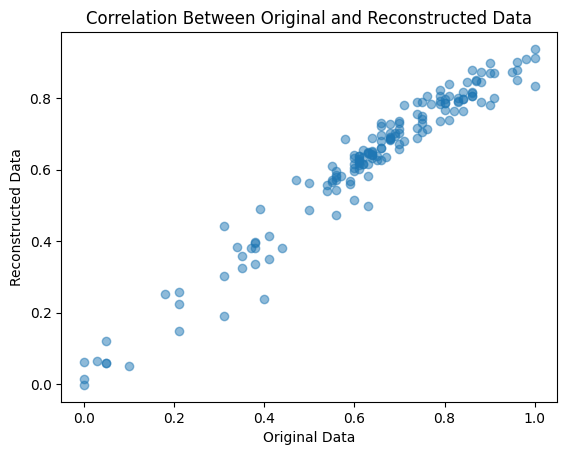

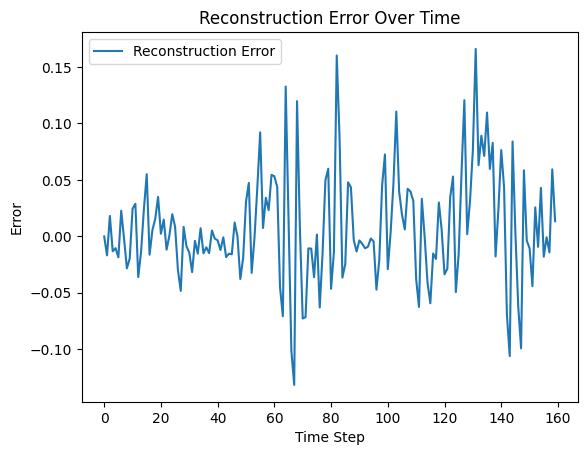

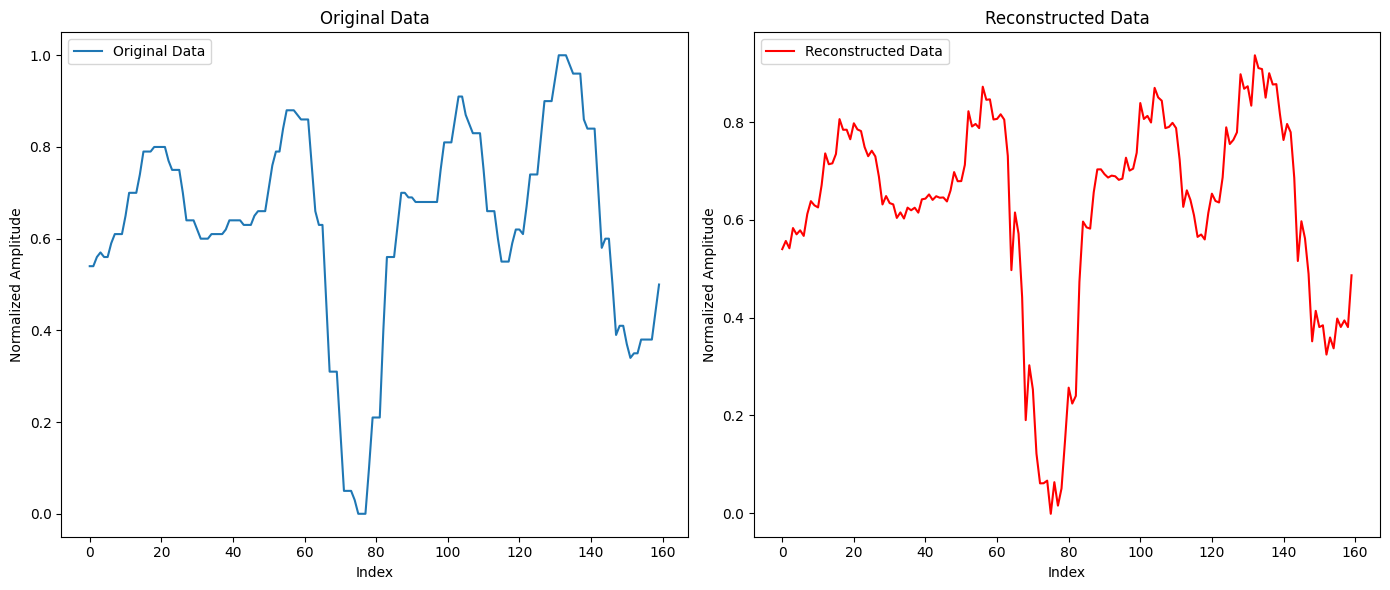

In [5]:
plt.figure()
plt.plot(loss_history, label='Training Loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training Loss History')
plt.legend()
plt.show()
# Plot Mean Squared Error (MSE) History
plt.figure()
plt.plot(mse_history, label='Mean Squared Error (MSE)')
plt.xlabel('Step')
plt.ylabel('MSE')
plt.title('Mean Squared Error (MSE) History')
plt.legend()
plt.show()

# Plot Mean Absolute Error (MAE) History
plt.figure()
plt.plot(mae_history, label='Mean Absolute Error (MAE)')
plt.xlabel('Step')
plt.ylabel('MAE')
plt.title('Mean Absolute Error (MAE) History')
plt.legend()
plt.show()
reconstructed_data_flat = reconstructed_data.flatten()
original_data_flat = segmented_data.flatten()

errors = original_data_flat - reconstructed_data_flat

plt.figure()
plt.hist(errors, bins=50, alpha=0.7, label='Reconstruction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Histogram of Reconstruction Errors')
plt.legend()
plt.show()
num_examples = 5
indices = np.random.choice(len(segmented_data), num_examples, replace=False)

plt.figure(figsize=(12, 8))
for i, idx in enumerate(indices):
    plt.subplot(num_examples, 2, 2*i + 1)
    plt.plot(segmented_data[idx], label='Original Segment')
    plt.xlabel('Index')
    plt.ylabel('Normalized Amplitude')
    plt.title(f'Original Segment {i+1}')
    plt.legend()

    plt.subplot(num_examples, 2, 2*i + 2)
    plt.plot(reconstructed_data[idx], label='Reconstructed Segment')
    plt.xlabel('Index')
    plt.ylabel('Normalized Amplitude')
    plt.title(f'Reconstructed Segment {i+1}')
    plt.legend()

plt.tight_layout()
plt.show()
plt.figure()
plt.scatter(original_data_flat, reconstructed_data_flat, alpha=0.5)
plt.xlabel('Original Data')
plt.ylabel('Reconstructed Data')
plt.title('Correlation Between Original and Reconstructed Data')
plt.show()
time_steps = np.arange(len(errors))

plt.figure()
plt.plot(time_steps, errors, label='Reconstruction Error')
plt.xlabel('Time Step')
plt.ylabel('Error')
plt.title('Reconstruction Error Over Time')
plt.legend()
plt.show()
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(original_data_flat, label='Original Data')
plt.xlabel('Index')
plt.ylabel('Normalized Amplitude')
plt.title('Original Data')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(reconstructed_data_flat, label='Reconstructed Data', color='r')
plt.xlabel('Index')
plt.ylabel('Normalized Amplitude')
plt.title('Reconstructed Data')
plt.legend()

plt.tight_layout()
plt.show()
